# Logistic Regression - Manual

In [41]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Seed
np.random.seed(101)

In [43]:
# Hyper-Parameters
num_classes = 2
num_features = 2
num_points = 300
epochs = 50000
learning_rate = 0.001

In [44]:
# Generate data
x, y_true = make_classification(n_samples=num_points, n_features=num_features, n_redundant=0, n_clusters_per_class=num_classes, class_sep=1.5)

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.3, random_state=101)

Text(0, 0.5, 'x2')

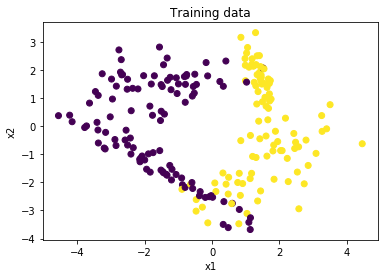

In [46]:
# Plot training data
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.title('Training data')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

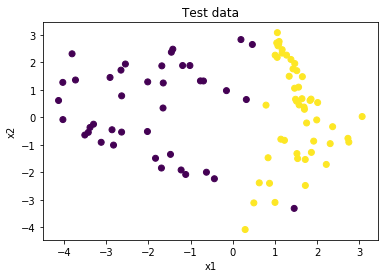

In [47]:
# Plot test data
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
# Title and axes
plt.title('Test data')
plt.xlabel('x1')
plt.ylabel('x2')

In [48]:
# Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [49]:
# x to plot sigmoid
x_sig = np.linspace(-10,10,100)

Text(0.5, 1.0, 'Sigmoid')

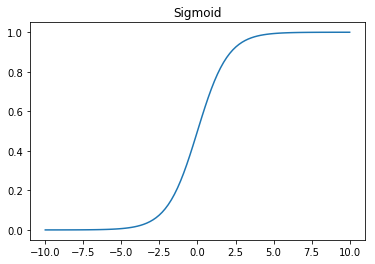

In [50]:
# Plot sigmoid function
plt.plot(x_sig, sigmoid(x_sig))
plt.title('Sigmoid')

In [51]:
# Weights and bias
W1 = np.random.randn()
W2 = np.random.randn()
b = np.random.randn()

In [52]:
# Loss function
def logistic_loss(y_true, y_hat):
    loss = -np.mean(y_true * np.log(y_hat) + (1-y_true) * np.log(1-y_hat))
    return loss

In [53]:
# Gradient function
def gradient(y_true, y_hat, features):
    err = y_true - y_hat
    w1_gradient = np.sum(-np.dot(features[:,0], err))*(1/len(y_true))
    w2_gradient = np.sum(-np.dot(features[:,1], err))*(1/len(y_true))
    b_gradient = np.sum(err)*(1/len(y_true))
    return w1_gradient, w2_gradient, b

In [ ]:
# Training loop
for epoch in range(epochs):
    # Predictions for training data
    y_hat_train = sigmoid(W1*X_train[:,0] + W2*X_train[:,1] + b)
    # Error
    error = logistic_loss(y_train, y_hat_train)
    # Print training progress
    print('Epoch: {}, Error: {}'.format(epoch, error))
    # New weights and bias
    new_w1, new_w2, new_b = gradient(y_train, y_hat_train, X_train)
    # Update W1
    W1 = W1 - learning_rate * new_w1
    # Update W2
    W2 = W2 - learning_rate * new_w2
    # Update bias
    b = b - learning_rate * new_b

Text(0, 0.5, 'x2')

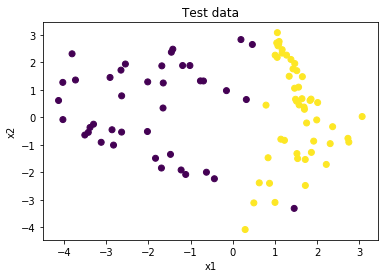

In [55]:
# Plot original test data
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
# Title and axes
plt.title('Test data')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

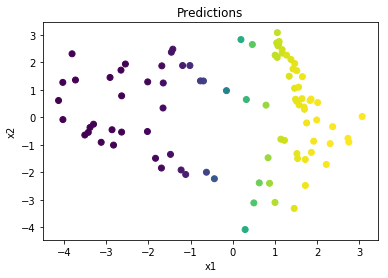

In [56]:
# Predictions for test data
y_hat_test = sigmoid(W1*X_test[:,0] + W2*X_test[:,1] + b)
# Plot predictions for test data
plt.scatter(X_test[:,0], X_test[:,1], c = y_hat_test)
# Title and axes
plt.title('Predictions')
plt.xlabel('x1')
plt.ylabel('x2')

In [57]:
# Round predictions to 1 or 0
test_rounded = [1 if el >= 0.5 else 0 for el in y_hat_test]

Text(0, 0.5, 'x2')

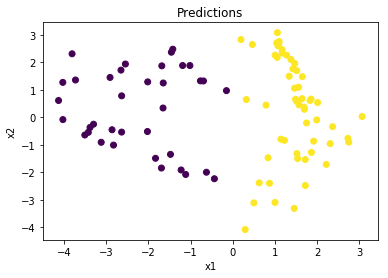

In [58]:
# Plot final predictions for test data
plt.scatter(X_test[:,0], X_test[:,1], c = test_rounded)
# Title and axes
plt.title('Predictions')
plt.xlabel('x1')
plt.ylabel('x2')

In [59]:
# Accuracy for test data
np.mean(y_test == test_rounded)

0.9555555555555556

In [60]:
# Decision Boundary (separating line)
a = -W1 / W2
xx = np.linspace(-5, 5, 100)
yy = a * xx - b / W2

Text(0, 0.5, 'x2')

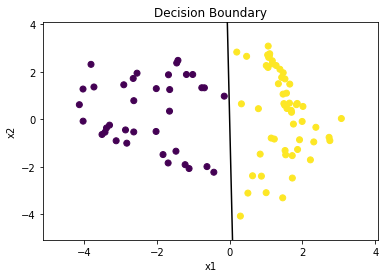

In [61]:
# Set axes
plt.xlim(X_test[:,0].min()-1, X_test[:,0].max()+1)
plt.ylim(X_test[:,1].min()-1, X_test[:,1].max()+1)
# Plot predictions
plt.scatter(X_test[:,0], X_test[:,1], c = test_rounded)
# Plot Decision Boundary
plt.plot(xx, yy, 'k-')
# Title and axes
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')

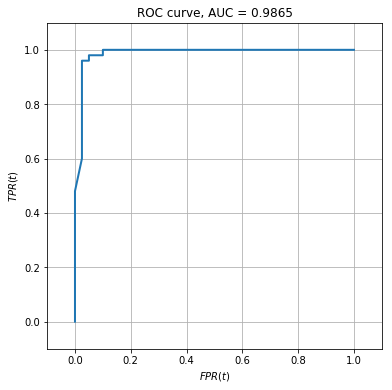

In [62]:
# Plot ROC Curve

thresholds = np.linspace(1,0,101)

ROC = np.zeros((101,2))

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( y_hat_test > t, y_test==1 ).sum()
    TN_t = np.logical_and( y_hat_test <=t, y_test==0 ).sum()
    FP_t = np.logical_and( y_hat_test > t, y_test==0 ).sum()
    FN_t = np.logical_and( y_hat_test <=t, y_test==1 ).sum()

    # Compute false positive rate for current threshold.
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t

    # Compute true  positive rate for current threshold.
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

# AUC
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5


# Plot the ROC curve.
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.title('ROC curve, AUC = %.4f'%AUC)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

# Logistic Regression - Sklearn

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [64]:
# Create Logistic Regression model
log = LogisticRegression()
# Train model
log.fit(X_train, y_train)

/home/przemo/tfenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
# Predictions
preds = log.predict(X_test)

In [66]:
# Classification report
print(classification_report(y_test, preds))
# Confusion matrix
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.94      1.00      0.97        50

   micro avg       0.97      0.97      0.97        90
   macro avg       0.97      0.96      0.97        90
weighted avg       0.97      0.97      0.97        90

[[37  3]
 [ 0 50]]


Text(0, 0.5, 'x2')

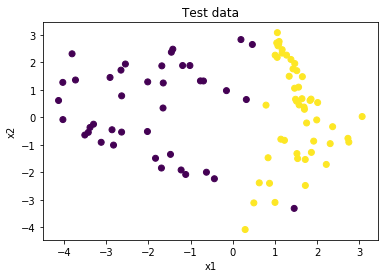

In [67]:
# Plot original test data
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
# Title and axes
plt.title('Test data')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

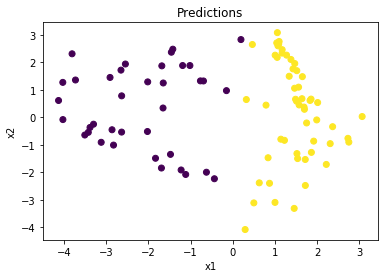

In [68]:
# Plot predictions
plt.scatter(X_test[:,0], X_test[:,1], c = preds)
# Title and axes
plt.title('Predictions')
plt.xlabel('x1')
plt.ylabel('x2')

In [69]:
# Weights and bias from model
W1_model = log.coef_[0][0]
W2_model = log.coef_[0][1]
b_model = log.intercept_[0]

In [70]:
# Decision Boundary (separating line)
a = -W1_model / W2_model
xx = np.linspace(-5, 5, 100)
yy = a * xx - b_model / W2_model

Text(0, 0.5, 'x2')

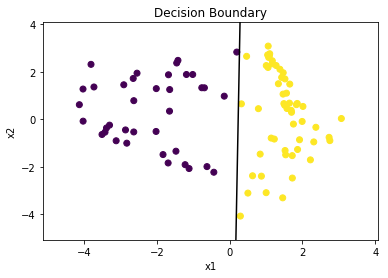

In [71]:
# Set axes
plt.xlim(X_test[:,0].min()-1, X_test[:,0].max()+1)
plt.ylim(X_test[:,1].min()-1, X_test[:,1].max()+1)
# Plot predictions
plt.scatter(X_test[:,0], X_test[:,1], c = preds)
# Plot Decision Boundary
plt.plot(xx, yy, 'k-')
# Title and axes
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')

In [72]:
# FPR and TPR
fpr_sklearn, tpr_sklearn, thresholds = roc_curve(y_test, preds)
# AUC
roc_auc = auc(fpr_sklearn, tpr_sklearn)

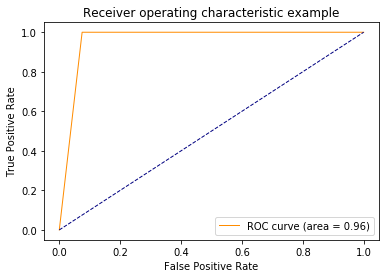

In [73]:
# Plot ROC Curve
plt.plot(fpr_sklearn, tpr_sklearn, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")